In [2]:
import pandas as pd
import numpy as np

def load_data():
    data = pd.read_csv('/content/comments_imdb.csv')
    return data

data = load_data()
data.head(4)

,comments
0,one review mention watch oz episod hook right ...
1,wonder littl product br br film techniqu unass...
2,thought wonder way spend time hot summer weeke...
3,basic famili littl boy jake think zombi closet...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  9982 non-null   object
dtypes: object(1)
memory usage: 78.1+ KB


In [5]:
df = pd.DataFrame(data['comments'])
df.head(5)

,comments
0,one review mention watch oz episod hook right ...
1,wonder littl product br br film techniqu unass...
2,thought wonder way spend time hot summer weeke...
3,basic famili littl boy jake think zombi closet...
4,petter mattei love time money visual stun film...


In [6]:
!pip install textblob

In [8]:
from textblob import TextBlob
import numpy as np

sentiments = []

for text in df['comments']:
    if isinstance(text, str):
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity
        if polarity > 0:
            sentiments.append('positive')
        elif polarity < 0:
            sentiments.append('negative')
        else:
            sentiments.append('positive')
    else:
        sentiments.append(np.nan)

df['sentiment'] = sentiments

data = df[['comments', 'sentiment']]
data.head(5)

,comments,sentiment
0,one review mention watch oz episod hook right ...,positive
1,wonder littl product br br film techniqu unass...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic famili littl boy jake think zombi closet...,positive
4,petter mattei love time money visual stun film...,positive


C:\Users\amara\AppData\Local\Temp\ipykernel_36092\3051709567.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


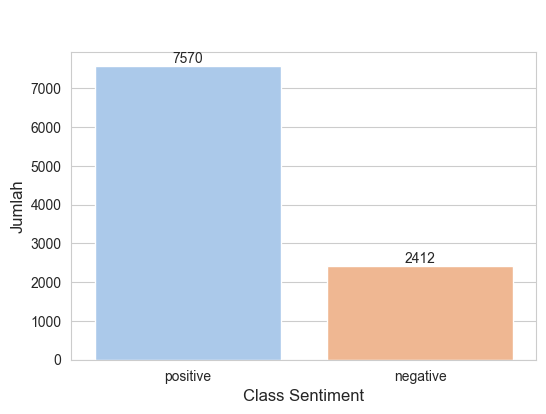

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['sentiment'].value_counts()

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title(' ', fontsize=14, pad=20)
plt.xlabel('Class Sentiment',fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

for i, count in enumerate(sentiment_count.values):
    ax.text(i, count+0.10, str(count), ha='center', va='bottom')

plt.show()

In [7]:
data.to_csv('Hasil_Labeling_imdb.csv',encoding='utf8', index=False)